# Classification using KNN

In [2]:
#KNN       When you have even number of categories then always take a odd K
import pandas as pd
import math
import matplotlib.pyplot as plt

ds1=pd.read_csv("./xdata.csv")
ds2=pd.read_csv("./ydata.csv")

X=ds1.values[:,1:]            #.values returns a numpy array [all rows, from 1 to all columns]
Y=ds2.values[:,1:]
Y=Y.reshape((-1))             #Or use Y.flatten()  (Coverts to 1D array)

test_point=(0,1)

def KNN(X,Y,point,K=5):
    neighbors=[]

    for i in range(X.shape[0]):
        eucdist=math.sqrt((X[i,0]-test_point[0])**2 + (X[i,1]-test_point[1])**2)     #OR  eudist=np.sqrt(np.sum((X[i]-test_point)**2))
        neighbors.append(eucdist)

    sortedN=sorted(neighbors)

    nearestN=sortedN[:K]

    indexes=[]

    for i in nearestN:
        indexes.append(neighbors.index(i))

    nearcat=[]

    for i in indexes:
        nearcat.append(Y[i])

    Ones=nearcat.count(1)
    Zeros=nearcat.count(0)

    if Ones>Zeros:
        print(1)
    else:
        print(0)                  #as our K was odd, thus Ones and Zeros can never be equal. 

    scatterx1=X[:,0]              #Width
    scattery1=X[:,1]              #Height
    plt.scatter(scatterx1,scattery1,c=Y*5)
    plt.scatter(test_point[0],test_point[1],c="red")

1


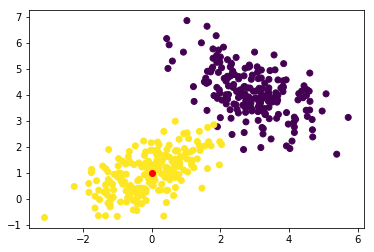

In [3]:
KNN(X,Y,test_point)

In [4]:
#You can also do it like appending the distances and the category type Y[i] in a list and then sort it.
#It will get sorted by it's 0th columns and then you can just check the categories by list[i][1]

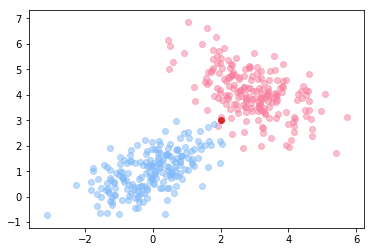

In [6]:
for i in range(X.shape[0]):
    if(Y[i] == 0):
        plt.scatter(X[i,0],X[i,1],c = '#f97f9e',alpha=.5)
    else:
        plt.scatter(X[i,0],X[i,1],c = '#7fb9f9',alpha=.5) 
        
plt.scatter(2,3,c='#d82929')

# Linear Regression using Gradient Descent

In [35]:
import numpy as np
import matplotlib.pyplot as plt

#arr=np.random.rand(100,2)
X=np.array([1,2,3,4,5])
Y=np.array([1,2,3,4,5])

def gradient_descent(X,Y):
    m=0
    c=0
    L=0.01
    epochs=1000
    n=X.size        #X and Y have equal sizes, you can take any
    
    
    for i in range(epochs):
        Dm=(-2/n) * np.sum(X * (Y-(m*X + c)))
        Dc=(-2/n) * np.sum(Y-(m*X + c))
        m=m-L*Dm
        c=c-L*Dc
        
    return m,c

In [36]:
m,c=gradient_descent(X,Y)
print(m,c)

0.9975901753359889 0.008700231670305317


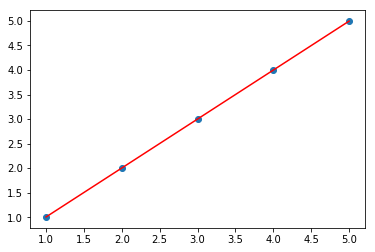

In [37]:
plt.scatter(X,Y)
plt.plot(X,m*X+c,c='red')

# Linear Regression with Scikit-learn (sklearn)

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [17]:
x=np.array([1,2,3,4,5,6,7,8,9,10])
x=x.reshape(2,5)                              #reshaped cause sklearn takes the input in the form of 2D array
y=np.array([10,20,30,40,50,60,70,80,90,100])
y=y.reshape(2,5)

In [18]:
lr=LinearRegression()
lr.fit(x,y)
xtest=np.array([33,44,55,66,77,88,99,111,122,133])
xtest=xtest.reshape(2,5)
predy=lr.predict(xtest)

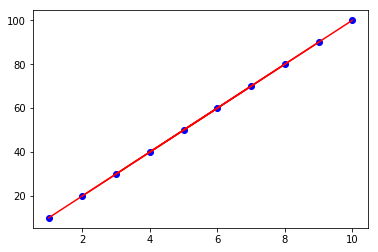

In [21]:
plt.scatter(x,y,c='blue')
plt.plot(x,lr.predict(x),c='red')     #Here we plotted the training data set and line for that cause
                                      #that's the stuff we want to visualize and see the pattern not the test one.

In [22]:
print(predy)

[[ 530.  540.  550.  560.  570.]
 [1086. 1096. 1106. 1116. 1126.]]


In [23]:
print(xtest)

[[ 33  44  55  66  77]
 [ 88  99 111 122 133]]


## K-Means

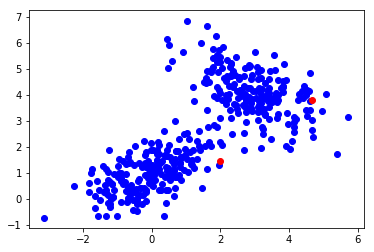

In [63]:
import pandas as pd
import math
import matplotlib.pyplot as plt

ds1=pd.read_csv("./xdata.csv")
ds2=pd.read_csv("./ydata.csv")

import numpy as np

X=ds1.values[:,1:]

points=np.random.random((2,2))*5              #we've multiplied the random array by 5 to give more distance b/w the points. It should be done according to the case itself.

plt.scatter(X[:,0],X[:,1],c='blue')
plt.scatter(points[0][0],points[0][1],c='red')
plt.scatter(points[1][0],points[1][1],c='red')

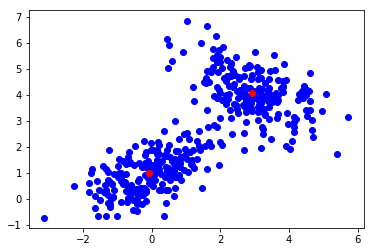

In [65]:
near1=[]
near2=[]
for i in range(X.shape[0]):
    dis1=np.abs(np.sum(X[i]-points[0]))
    dis2=np.abs(np.sum(X[i]-points[1]))
    
    if(dis1 < dis2):
        near1.append(X[i])
    else:
        near2.append(X[i])

mean1=np.mean(near1, axis=0)
mean2=np.mean(near2, axis=0)

points[0]=mean1
points[1]=mean2

plt.scatter(X[:,0],X[:,1],c='blue')
for i in range(points.shape[0]):
    plt.scatter(points[i][0],points[i][1],c='red')